In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
df = pd.read_csv("paviaU_CompleteData.csv")
df.head()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix95,pix96,pix97,pix98,pix99,pix100,pix101,pix102,pix103,class
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,178,198,193,224,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,208,231,255,...,255,255,255,255,255,255,255,255,255,0


In [5]:
X = df.loc[:, ['pix'+str(i) for i in range(1,104)]].values
# Separating out the target
y = df.loc[:,['class']].values

In [6]:
scaler_model = MinMaxScaler()
scaler_model.fit(X.astype(float))
x=scaler_model.transform(X)

In [7]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics
def perform_knnc(X_train, X_test, y_train, y_test, w = 'uniform'):
    # try K=1 through K=40 and record testing accuracy
    k_range = range(1, 41)

    # We can create Python list using [] or llist()
    scores = []

    # We use a loop through the range 1 to 40
    # We append the scores in a list
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w, algorithm='auto')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    scores=[i*100 for i in scores]
    return scores

def plot_acc(scores):
    plt.figure(figsize=(12, 6))
    plt.plot(scores, color='blue', linestyle='dashed', marker='o',  
             markerfacecolor='#ff6347', markersize=10)
    plt.title('Accuracy scores for K-values(1-40)')  
    plt.xlabel('K Value')
    plt.xticks=[i for i in range(1, 41)]
    plt.ylabel('Accuracy')
    plt.show()

## PCA

In [8]:
from sklearn.model_selection import train_test_split

pca = PCA(n_components=70)
principalComponents = pca.fit_transform(X)
sum(pca.explained_variance_ratio_)

0.9996941215372042

In [10]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC-'+str(i)  for i in range(1, 71)])
# Adding lables
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.to_csv('PaviaU_pca_70.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y.ravel(), test_size = 0.3, random_state = 100)
acc_scores=[]
acc_scores = perform_knnc(X_train, X_test, y_train, y_test, w = 'uniform')
print('Maximum Accuracy:',max(acc_scores),' at k-value',acc_scores.index(max(acc_scores))+1)

In [ ]:
acc_scores = perform_knnc(X_train, X_test, y_train, y_test, w = 'distance')
print('Maximum Accuracy:',max(acc_scores),' at k-value',acc_scores.index(max(acc_scores))+1)
for i in range(len(acc_scores)):
    print("Accuracy : %2.10f at k-value %2d"%(acc_scores[i], i+1))

In [ ]:
print(' Accuracy:',acc_scores[6],' at k-value',7)

## <font color='tomato'>Accuracies:</font>
## PCA + KNNC    =  86.78804855275443
## PCA + WKNNC =  87.58169934640523

### -------------------------------------------------------------------------------------------------------------------------------------------------------

# KPCA

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA

kpca = kpca = KernelPCA(n_components=70, kernel='poly')
principalComponents = kpca.fit_transform(X)
# Adding lables
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC-'+str(i)  for i in range(1, 71)])
# Adding lables
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.to_csv('salinas_kpca_70.csv')


In [44]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y.ravel(), test_size = 0.3, random_state = 100)
acc_scores=[]
acc_scores = perform_knnc(X_train, X_test, y_train, y_test, w = 'uniform')
print('Maximum Accuracy:',max(acc_scores),' at k-value',acc_scores.index(max(acc_scores))+1)
print('Maximum Accuracy:',acc_scores[6],' at k-value',7)

Maximum Accuracy: 85.80765639589168  at k-value 9
Maximum Accuracy: 85.52754435107376  at k-value 7


In [45]:
acc_scores = perform_knnc(X_train, X_test, y_train, y_test, w = 'distance')
print('Maximum Accuracy:',max(acc_scores),' at k-value',acc_scores.index(max(acc_scores))+1)
print('Maximum Accuracy:',acc_scores[6],' at k-value',7)

Maximum Accuracy: 87.06816059757236  at k-value 6
Maximum Accuracy: 86.60130718954248  at k-value 7


## <font color='tomato'>Accuracies:</font>
## PCA + KNNC    =  86.78804855275443
## PCA + WKNNC =  87.58169934640523
## KPCA + KNNC      =  85.52754435107376
## KPCA + WKNNC   =  86.60130718954248

In [49]:
def plot_gt(X, Y, k_value, w='uniform', q='plot'):
    neigh = KNeighborsClassifier(n_neighbors = k_value, weights= w, algorithm='auto')
    neigh.fit(X, Y.ravel())
    pred = neigh.predict(X)
    gt = pred
    gt.resize((86, 83))
    fig = plt.figure(figsize=(6, 6))
    plt.title("Clasification Map(salinas): "+q)
    plt.imshow(gt, cmap='jet')
    q = q+'.png'
    fig.savefig(q, dpi=fig.dpi, bbox_inches="tight")
    plt.colorbar()
    plt.show()

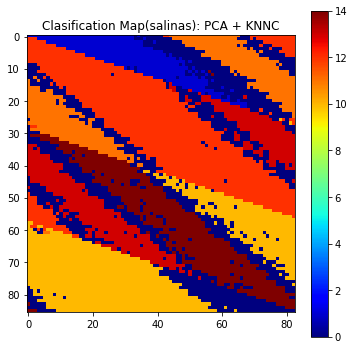

In [51]:
df = pd.read_csv("salinas_pca_70.csv")
X = df.loc[:, ['PC-'+str(i) for i in range(1,71)]].values
# Separating out the target
Y = df.loc[:,['class']].values
plot_gt(X, Y, k_value=7, w='uniform', q='PCA + KNNC')

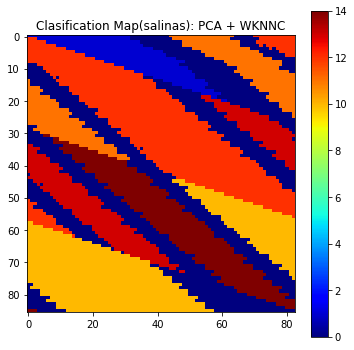

In [52]:
df = pd.read_csv("salinas_pca_70.csv")
X = df.loc[:, ['PC-'+str(i) for i in range(1,71)]].values
# Separating out the target
Y = df.loc[:,['class']].values
plot_gt(X, Y, k_value=7, w='distance', q='PCA + WKNNC')

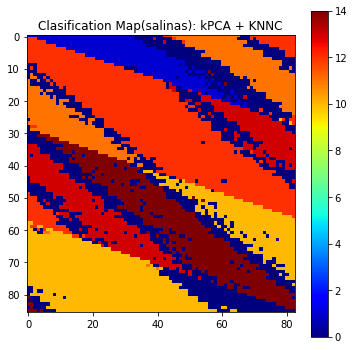

In [54]:
df = pd.read_csv("salinas_kpca_70.csv")
X = df.loc[:, ['PC-'+str(i) for i in range(1,71)]].values
# Separating out the target
Y = df.loc[:,['class']].values
plot_gt(X, Y, k_value=7, q='kPCA + KNNC')

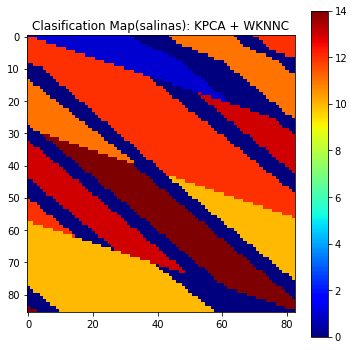

In [55]:
df = pd.read_csv("salinas_kpca_70.csv")
X = df.loc[:, ['PC-'+str(i) for i in range(1,71)]].values
# Separating out the target
Y = df.loc[:,['class']].values
plot_gt(X, Y, k_value=7, w='distance', q='KPCA + WKNNC')